In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
{
  "MarkdownCell": {
    "cm_config": {
      "lineWrapping": True
    }
  },
  "CodeCell": {
    "cm_config": {
      "lineWrapping": True
    }
  }
}

{'MarkdownCell': {'cm_config': {'lineWrapping': True}},
 'CodeCell': {'cm_config': {'lineWrapping': True}}}

In [3]:
#import main packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

import matplotlib.pyplot as plt

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [36]:
from sklearn.preprocessing import StandardScaler

In [95]:
#import machine learning models
from sklearn import model_selection

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model

#create an list with all models

models = []
models.append(("LR", LinearRegression()))
models.append(("SVR", SVR(kernel="rbf")))
models.append(("DT", DecisionTreeRegressor(criterion="mse")))
models.append(("RF", RandomForestRegressor(random_state=0)))
models.append(("LS", linear_model.Lasso(alpha=0.1)))

In [96]:
#function to run the models
def run_models(models, X, y):
    # evaluate each model in turn
    results = []
    names = []
    scoring = 'r2'
    for name, model in models:
        #if polynomial regression, fix dataset first
        kfold = model_selection.KFold(n_splits=5, random_state=42, shuffle = True)
        cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    # boxplot algorithm comparison
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

In [97]:
#import the dataset
train = pd.read_csv("train.csv")

In [98]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [99]:
X, y = train.drop('SalePrice', axis = 1), train['SalePrice']

In [100]:
#We are going to run serveral experiments with different columns that I 

### Experiment 1

LR: 0.005328 (0.006252)


C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array w

SVR: 0.122059 (0.025659)
DT: 0.236232 (0.025671)


C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_va

RF: 0.236775 (0.025920)
LS: -0.001549 (0.002210)


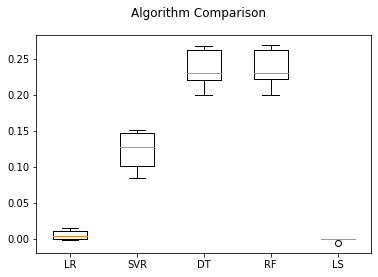

In [101]:
train_experiment_1 = train[['MSSubClass', 'SalePrice']]

#scale the dataset
ss_x = StandardScaler()
ss_y = StandardScaler()

X_scaled = ss_x.fit_transform(train_experiment_1[['MSSubClass']])
y_scaled = ss_y.fit_transform(train_experiment_1[['SalePrice']])

run_models(models, X_scaled, y_scaled)

### Experiment 2

In [102]:
train_experiment_2 = train[['MSSubClass', 'MSZoning', 'SalePrice']]

In [103]:
train_experiment_2.head()

,MSSubClass,MSZoning,SalePrice
0,60,RL,208500
1,20,RL,181500
2,60,RL,223500
3,70,RL,140000
4,60,RL,250000


In [104]:
train_experiment_2 = pd.get_dummies(train_experiment_2)

In [105]:
#scale the dataset
ss_x = StandardScaler()
ss_y = StandardScaler()

X_scaled = ss_x.fit_transform(train_experiment_2.drop('SalePrice', axis = 1))
y_scaled = ss_y.fit_transform(train_experiment_2[['SalePrice']])

LR: 0.102021 (0.037036)


C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array w

SVR: 0.083907 (0.034174)
DT: 0.255838 (0.020125)


C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_va

RF: 0.259037 (0.019346)
LS: 0.072899 (0.021196)


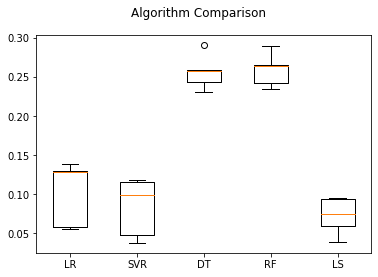

In [106]:
run_models(models, X_scaled, y_scaled)

### Experiment 3

In [107]:
train_experiment_3 = train[['MSSubClass', 'MSZoning', 'SalePrice', 'LotFrontage']]

In [108]:
train_experiment_3.head()

,MSSubClass,MSZoning,SalePrice,LotFrontage
0,60,RL,208500,65.0
1,20,RL,181500,80.0
2,60,RL,223500,68.0
3,70,RL,140000,60.0
4,60,RL,250000,84.0


In [109]:
#go get dummies
train_experiment_3 = pd.get_dummies(train_experiment_3)

In [110]:
#scale the dataset
ss_x = StandardScaler()
ss_y = StandardScaler()

X_scaled = ss_x.fit_transform(train_experiment_3.drop('SalePrice', axis = 1))
y_scaled = ss_y.fit_transform(train_experiment_3[['SalePrice']])

C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_base.py", line 662, in fit
    X, y = self._validate_data(
  File "C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py", line 576, in _validate_data
    X, y = check_X_y(X, 

LR: nan (nan)
SVR: nan (nan)
DT: nan (nan)
RF: nan (nan)
LS: nan (nan)


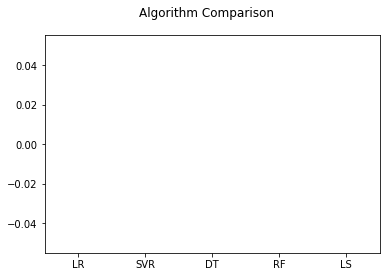

In [111]:
run_models(models, X_scaled, y_scaled)